In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

## Import Data

In [3]:
##importing data
cc_ds2= pd.read_csv('Dataset/crx_new.csv')

##droping index
cd=cc_ds2.drop(columns=["Unnamed: 0"])

##dropping nan values
cd2=cd
cd.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approval
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
#See number of NaN values in columns.
nullcd=cd.isnull().sum() * 100 / len(cd)

#Creating a list with columns containg  missing values
nullcd1=pd.DataFrame(nullcd)
nullcd1

,0
A1,1.739130
A2,1.739130
A3,0.000000
A4,0.869565
A5,0.869565
A6,1.304348
A7,1.304348
A8,0.000000
A9,0.000000
A10,0.000000


# Data Imputation

In [5]:
#Using mean as Data imputation strategy
mean_imputer = SimpleImputer(strategy='most_frequent')

#The dataframe will be converted to npArrays
cd_imp=cd2
cd_imp=mean_imputer.fit_transform(cd_imp)
cd_imp

#Using Column name from previous dataframe (df5)
Clmns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15','Approval']
cd_imp2=pd.DataFrame(data=cd_imp, columns=Clmns)
cd_imp2.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approval
0,b,30.83,0,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.5,u,g,q,h,1.5,t,f,0,f,g,280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [6]:
#See number of NaN values in columns.
nullcd2=cd_imp2.isnull().sum() * 100 / len(cd_imp2)

#Creating a list with columns containg  missing values
nullcd3=pd.DataFrame(nullcd2)
nullcd3

,0
A1,0.0
A2,0.0
A3,0.0
A4,0.0
A5,0.0
A6,0.0
A7,0.0
A8,0.0
A9,0.0
A10,0.0


## Label Encoder - Converting objects to integer

In [7]:
from sklearn.preprocessing import LabelEncoder
cols = ['A1','A4','A5','A6','A7','A9','A10','A12','A13','Approval']
le = LabelEncoder()
for col in cols:
    cd_imp2[col] = le.fit_transform(cd_imp2[col])
cd3=cd_imp2
cd3.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approval
0,1,30.83,0,1,0,12,7,1.25,1,1,1,0,0,202,0,0
1,0,58.67,4.46,1,0,10,3,3.04,1,1,6,0,0,43,560,0
2,0,24.5,0.5,1,0,10,3,1.5,1,0,0,0,0,280,824,0
3,1,27.83,1.54,1,0,12,7,3.75,1,1,5,1,0,100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,0


## Train Split

In [8]:
#X= cd3.drop(columns=['Approval','A4','A5','A2','A1'], axis=1)
X= cd3.drop('Approval', axis=1)
y=cd3['Approval']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((345, 15), (345,), (345, 15), (345,))

## Pipeline creation

In [9]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Apply  Classifier


In [10]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=42))])

In [11]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [12]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [13]:
pipeline_svm=Pipeline([('scalar3',StandardScaler()),
                     ('svc_classifier',SVC())])

In [14]:
pipeline_xgb=Pipeline([('scalar3',StandardScaler()),
                     ('xgb_classifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1,
                      max_depth=3, random_state=42).fit(X_train, y_train))])

#### List of pipelines

In [15]:
## list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_svm, pipeline_xgb]

In [16]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [17]:
## Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'SVM', 4:'xgb'}

## Fit the pipelines

for pipe in pipelines:
	pipe.fit(X_train, y_train)

#### Pipeline results

In [18]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8724637681159421
Decision Tree Test Accuracy: 0.8202898550724638
RandomForest Test Accuracy: 0.8782608695652174
SVM Test Accuracy: 0.8840579710144928
xgb Test Accuracy: 0.8695652173913043


In [19]:
class color:
   
   RED = '\033[91m'
   BOLD = '\033[1m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print(color.BOLD + color.BLUE+'Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:SVM


# Precision Recall Curve

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

#### SVM

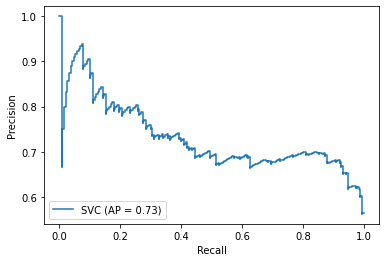

In [21]:
classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

disp = plot_precision_recall_curve(classifier, X_test, y_test)

#### GBC

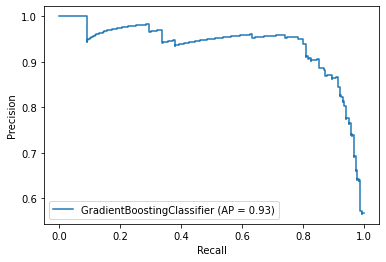

In [22]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
                      max_depth=3, random_state=42).fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
disp = plot_precision_recall_curve(classifier, X_test, y_test)

#### LR

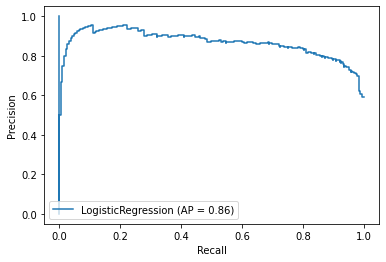

In [23]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

disp = plot_precision_recall_curve(classifier, X_test, y_test)

## Hyperparameter

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Create a pipeline

pipe = Pipeline([('scalar3',StandardScaler()),("classifier",RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [26]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('scalar3', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=10))])
The mean accuracy of the model is: 0.8753623188405797


## Ensemble

In [27]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(pipeline_lr)

In [28]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('scalar1', StandardScaler()),
                                                 ('lr_classifier',
                                                  LogisticRegression(random_state=42))]))

In [29]:
bagging.score(X_test, y_test)

0.8782608695652174

## Voting classifier

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = pipeline_lr
clf2 = pipeline_dt
clf3 = pipeline_randomforest
clf4 = pipeline_svm
clf5 = pipeline_xgb

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svm', clf4), ('gbc', clf5)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Decision Tree', 'RandomForest', 'SVM', 'GradientBoostingClassifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print(color.BOLD + color.BLUE+"Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.85 (+/- 0.12) [Logistic Regression]
Accuracy: 0.79 (+/- 0.08) [Decision Tree]
Accuracy: 0.85 (+/- 0.10) [RandomForest]
Accuracy: 0.85 (+/- 0.13) [SVM]
Accuracy: 0.83 (+/- 0.10) [GradientBoostingClassifier]
Accuracy: 0.85 (+/- 0.12) [Ensemble]


In [31]:
eclf1=eclf.fit(X_test, y_test)
eclf.score(X_test, y_test)


1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       190

    accuracy                           1.00       345
   macro avg       1.00      1.00      1.00       345
weighted avg       1.00      1.00      1.00       345

[[155   0]
 [  0 190]]


<AxesSubplot:>

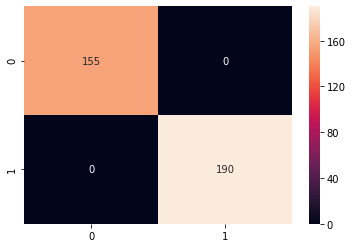

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
pred_eclf = eclf1.predict(X_test)
print(classification_report(y_test, pred_eclf))
print(confusion_matrix(y_test, pred_eclf))
pred_eclf_cm=confusion_matrix(y_test, pred_eclf)
sns.heatmap(pred_eclf_cm, annot=True, fmt="d")

## Saving our model

In [46]:
import pickle

with open('./Saved_Modules/eclf_modules.pkl', 'wb') as f:
    pickle.dump(eclf, f)
    